**Import Libraries**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import display

**Load and Inspect the Dataset**

In [41]:
# Load the dataset
df = pd.read_csv('twitter_training.csv')

# Explore the structure and first few rows
display(df.head())

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**Rename Columns and Check for Missing Values**

In [42]:
# Rename columns to meaningful names
df.columns = ['id', 'category', 'sentiment_label', 'text']

print('After renaming columns')
display(df.head())

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


After renaming columns


,id,category,sentiment_label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Missing values in each column:
id                   0
category             0
sentiment_label      0
text               686
dtype: int64


**Download and Initialize VADER Sentiment Analyzer**

In [43]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Preprocess the Data**

In [44]:
# Preprocess the data: Focus on 'sentiment_label' and 'text' columns
df = df[['sentiment_label', 'category', 'text']]

# Convert 'text' column to string type and handle missing values
df['text'] = df['text'].astype(str)  # Convert all entries to strings
df['text'].fillna('', inplace=True)  # Replace NaN values with empty strings


**Calculate Sentiment Scores**

In [45]:
# Calculate sentiment scores for each tweet
df['sentiment_scores'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])


**Visualize Sentiment Distribution**

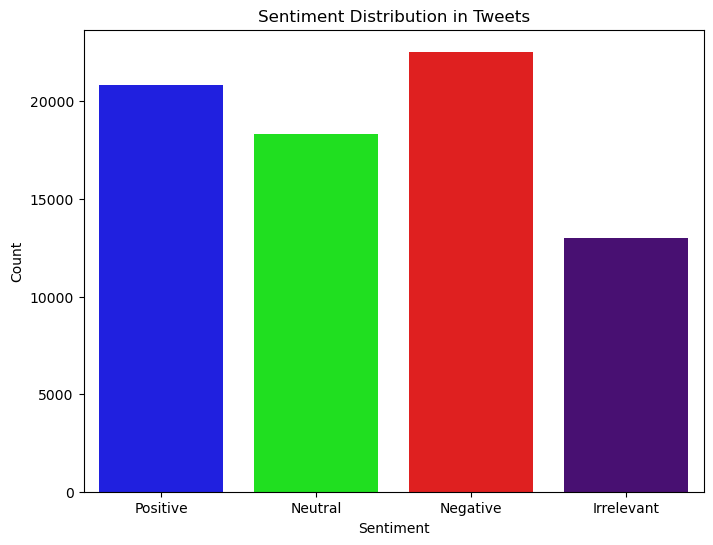

In [46]:
# Define custom color palettes
custom_palette_sentiment = ["#0000FF", "#00FF00", "#FF0000", "#4B0082"]  

# Plot sentiment distribution with custom colors
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette=custom_palette_sentiment)
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


**Visualize Sentiment Scores by Category**

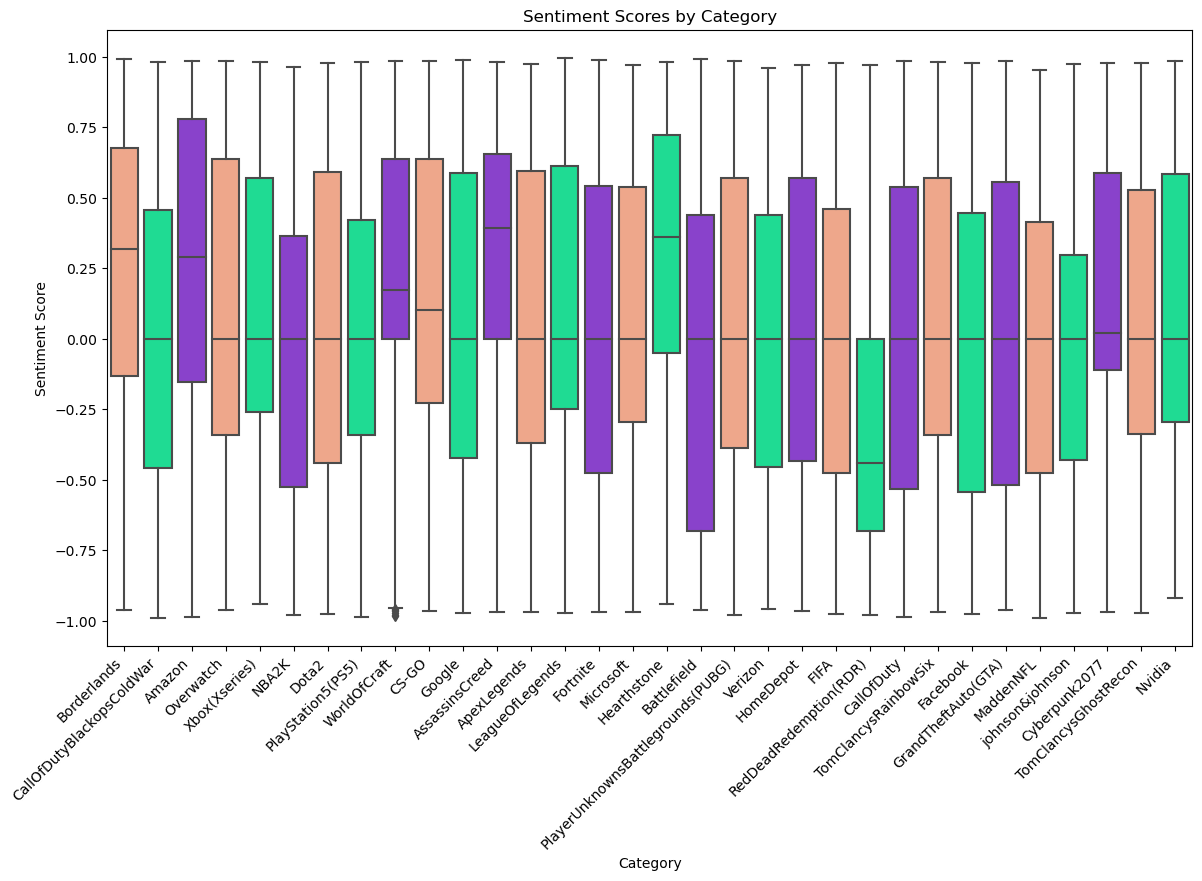

In [47]:
# Define a custom palette for sentiment scores by category
custom_palette_scores = ["#FFA07A", "#00FA9A", "#8A2BE2"]  # Light Salmon, Medium Spring Green, Blue Violet

# Visualize sentiment scores by category
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='sentiment_scores', data=df, palette=custom_palette_scores)
plt.title('Sentiment Scores by Category')
plt.xlabel('Category')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()


**Plot Distribution of Sentiment Scores**

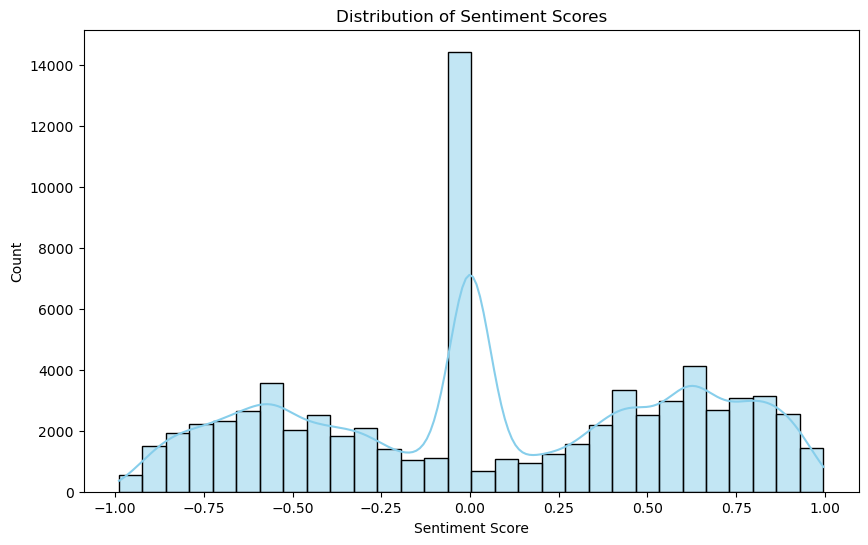

In [48]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df, x='sentiment_scores', bins=30, kde=True, color="#87CEEB")  # Sky Blue
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()
